In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [2]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns


Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [6]:
data.Income.unique() #WE can see that it is a classification model.


array([' <=50K', ' >50K'], dtype=object)

In [8]:
data.isna().sum()  #there is no null values so we can proceed further

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
data.describe()  #this shows that the data is normally distributed

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder


In [13]:
LE = LabelEncoder()
data['Income'] = LE.fit_transform(data['Income'])  #this will encode the income column


In [14]:
data.Income.unique() #WE can see that it is a classification model.


array([0, 1])

In [16]:
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [18]:
data.drop('Fnlwgt',axis=1,inplace=True) #as this has diffrent identity so we can drop this
data.drop('Education',axis=1,inplace=True) #education may not be relevant so we can also drop this
data.drop('Marital_status',axis=1,inplace=True) #this may not contribute for predicting income
data.drop('Relationship',axis=1,inplace=True) #same as marital status relationships may also not contribute for prediction
data.drop('Race',axis=1,inplace=True) #race is not relevant for predicting income
data.drop('Sex',axis=1,inplace=True) #sex will not contribute much for prediction we can drop it off
data.drop('Native_country',axis=1,inplace=True) #this is not a much needed feature


In [19]:
data.shape

(32560, 8)

In [20]:
data.head() #we have dropped all the unnecessary features

,Age,Workclass,Education_num,Occupation,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,Self-emp-not-inc,13,Exec-managerial,0,0,13,0
1,38,Private,9,Handlers-cleaners,0,0,40,0
2,53,Private,7,Handlers-cleaners,0,0,40,0
3,28,Private,13,Prof-specialty,0,0,40,0
4,37,Private,14,Exec-managerial,0,0,40,0


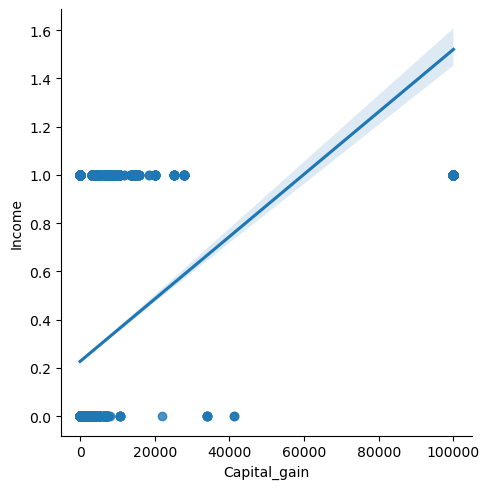

In [21]:
sns.lmplot(x='Capital_gain',y='Income',data=data,palette='colorblind')

#capital gains are the profit released by selling an investment this graph is positively directed 

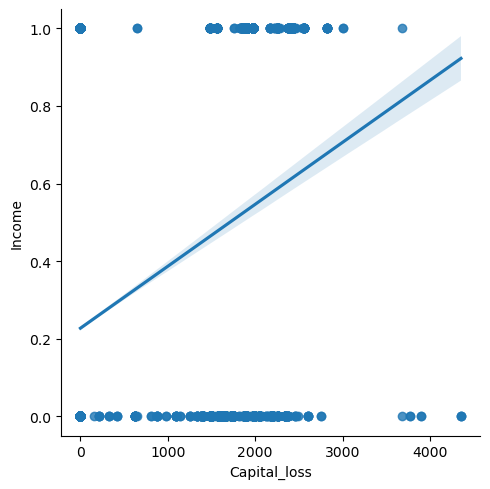

In [22]:
sns.lmplot(x='Capital_loss',y='Income',data=data,palette='colorblind')


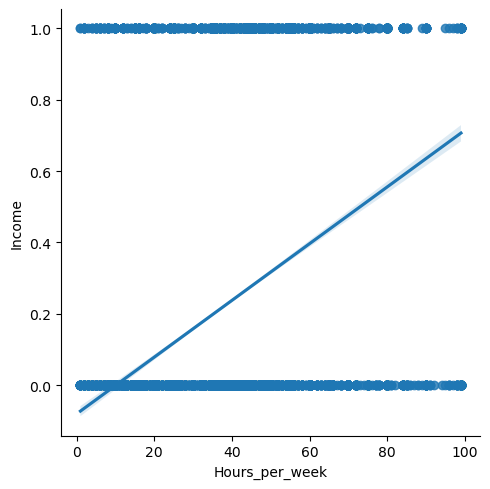

In [24]:
sns.lmplot(x='Hours_per_week',y='Income',data=data,palette='colorblind')

#higher is the working hour higher is the income


In [25]:
#generating dummy values on the given dataset
data= pd.get_dummies(data).astype(int)
data.head()


,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,9,0,0,40,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,53,7,0,0,40,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37,14,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
cor = data.corr()
cor


,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
Age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234039,0.042628,0.051227,0.060901,-0.019362,...,0.034210,-0.098579,-0.016257,-0.089346,0.015624,0.054171,0.003891,-0.031980,-0.019576,0.026910
Education_num,0.036527,1.000000,0.122627,0.079932,0.148127,0.335182,-0.077939,0.060526,0.097952,-0.015116,...,-0.101529,-0.127930,-0.158497,-0.169676,-0.071637,0.419028,0.005782,0.030266,0.060710,-0.115954
Capital_gain,0.077674,0.122627,1.000000,-0.031614,0.078409,0.223333,-0.015584,-0.005768,-0.007006,-0.002140,...,-0.011723,-0.023271,-0.025956,-0.040269,-0.007324,0.085224,-0.007135,0.011653,-0.009371,-0.018060
Capital_loss,0.057775,0.079932,-0.031614,1.000000,0.054256,0.150523,-0.016104,0.010797,0.014666,-0.003177,...,-0.010671,-0.021673,-0.016261,-0.040849,-0.011081,0.046253,-0.003175,0.009694,0.004828,-0.003283
Hours_per_week,0.068756,0.148127,0.078409,0.054256,1.000000,0.229690,-0.168641,0.013293,0.011576,-0.014262,...,0.094170,-0.042265,0.006598,-0.155873,-0.041467,0.060253,0.028102,0.009889,-0.013946,0.077596
Income,0.234039,0.335182,0.223333,0.150523,0.229690,1.000000,-0.078203,0.059369,0.033086,-0.008259,...,-0.051928,-0.087269,-0.069405,-0.156355,-0.037123,0.185861,0.028116,0.023682,0.025693,-0.021480
Workclass_ ?,0.042628,-0.077939,-0.015584,-0.016104,-0.168641,-0.078203,1.000000,-0.042608,-0.064072,-0.003585,...,-0.043379,-0.051233,-0.062570,-0.082026,-0.016575,-0.093301,-0.034862,-0.086860,-0.041870,-0.055517
Workclass_ Federal-gov,0.051227,0.060526,-0.005768,0.010797,0.013293,0.059369,-0.042608,1.000000,-0.045684,-0.002556,...,-0.022487,-0.015729,-0.034032,-0.037415,-0.011818,0.028850,0.011516,-0.053875,0.044341,-0.018567
Workclass_ Local-gov,0.060901,0.097952,-0.007006,0.014666,0.011576,0.033086,-0.064072,-0.045684,1.000000,-0.003843,...,-0.025401,-0.025615,-0.060832,-0.007809,-0.017771,0.164973,0.234996,-0.090352,-0.016295,0.007157
Workclass_ Never-worked,-0.019362,-0.015116,-0.002140,-0.003177,-0.014262,-0.008259,-0.003585,-0.002556,-0.003843,1.000000,...,-0.002602,-0.003073,-0.003753,-0.004920,-0.000994,-0.005597,-0.002091,-0.005210,-0.002512,-0.003330


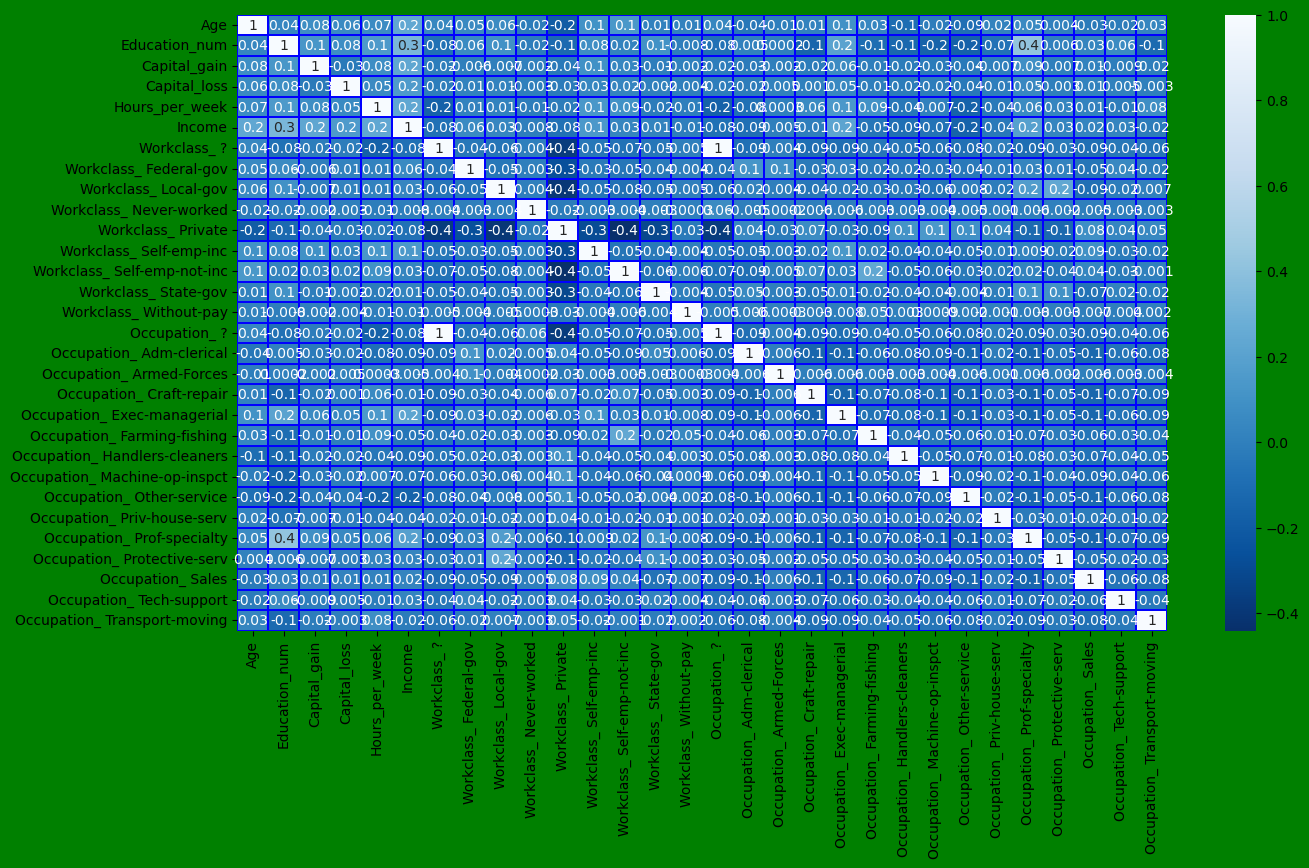

In [27]:
#we will use heatmap to check the multicollinearity
plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

from the above heatmap we can clearly see that there is no multicollinearity issue found so we can proceed 

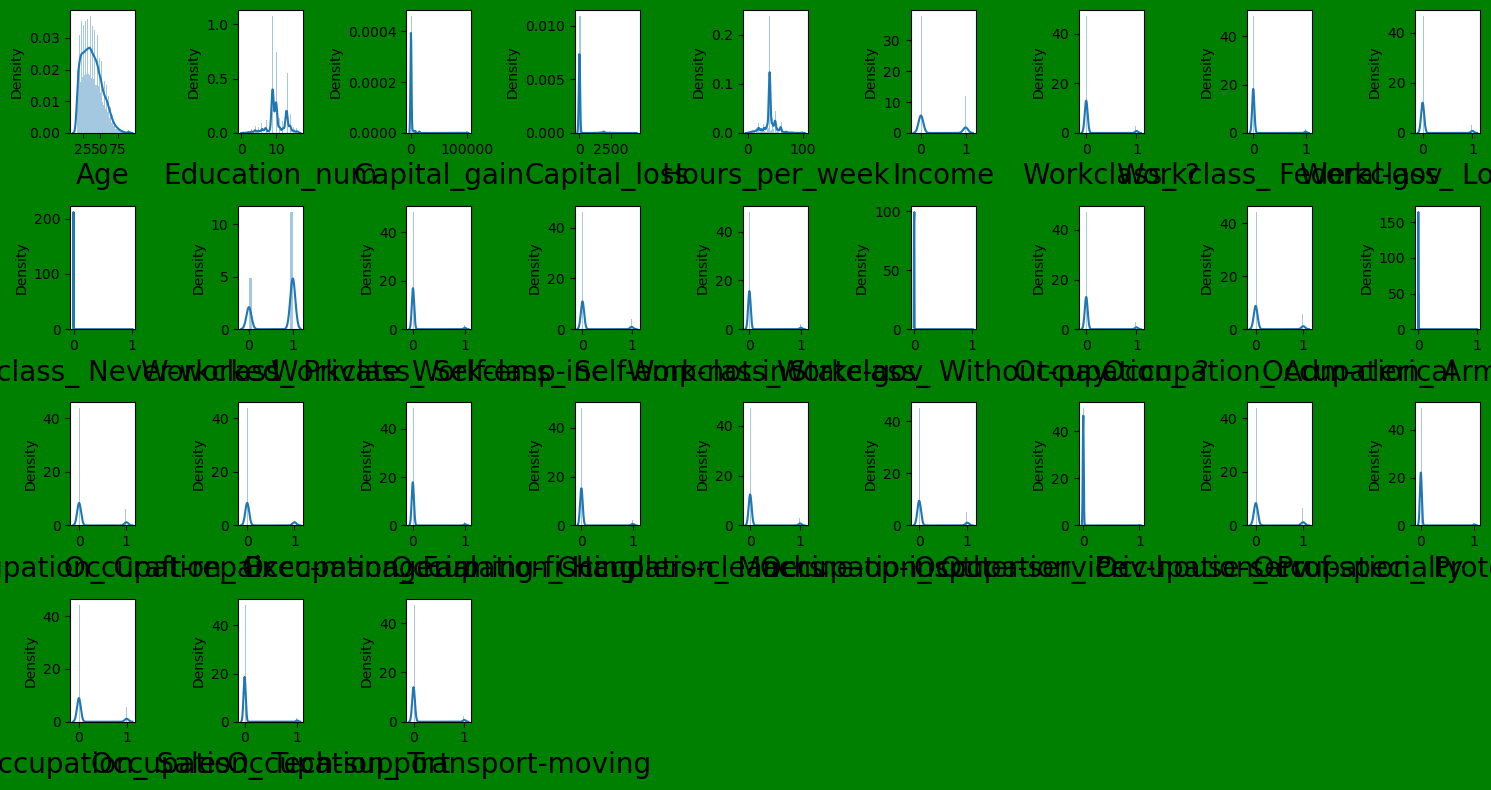

In [29]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=31:
        ax = plt.subplot(4,9,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [30]:
data.skew() #there is no such skewness found but still we will try to reduce it

Age                               0.558738
Education_num                    -0.311630
Capital_gain                     11.953690
Capital_loss                      4.594549
Hours_per_week                    0.227636
Income                            1.212383
Workclass_ ?                      3.846469
Workclass_ Federal-gov            5.563263
Workclass_ Local-gov              3.553376
Workclass_ Never-worked          68.182528
Workclass_ Private               -0.857656
Workclass_ Self-emp-inc           5.119915
Workclass_ Self-emp-not-inc       3.146333
Workclass_ State-gov              4.706125
Workclass_ Without-pay           48.196771
Occupation_ ?                     3.837734
Occupation_ Adm-clerical          2.402153
Occupation_ Armed-Forces         60.125794
Occupation_ Craft-repair          2.255635
Occupation_ Exec-managerial       2.269591
Occupation_ Farming-fishing       5.458092
Occupation_ Handlers-cleaners     4.562046
Occupation_ Machine-op-inspct     3.651093
Occupation_

In [31]:
#we will reduce the skewness through cube root method

data['Capital_gain']=np.cbrt(data['Capital_gain'])
data['Capital_loss']=np.cbrt(data['Capital_loss'])
data['Workclass_ Never-worked']=np.cbrt(data['Workclass_ Never-worked'])
data['Workclass_ Without-pay']=np.cbrt(data['Workclass_ Without-pay'])
data['Occupation_ Armed-Forces']=np.cbrt(data['Occupation_ Armed-Forces'])
data['Occupation_ Priv-house-serv']=np.cbrt(data['Occupation_ Priv-house-serv'])
data['Occupation_ Priv-house-serv']=np.cbrt(data['Occupation_ Priv-house-serv'])
data['Occupation_ Protective-serv']=np.cbrt(data['Occupation_ Protective-serv'])
data['Occupation_ Protective-serv']=np.cbrt(data['Occupation_ Protective-serv'])
data['Occupation_ Tech-support']=np.cbrt(data['Occupation_ Tech-support'])


In [32]:
data.skew() #we have successfully reduced skewness through cuberoot method

Age                               0.558738
Education_num                    -0.311630
Capital_gain                      4.100150
Capital_loss                      4.336999
Hours_per_week                    0.227636
Income                            1.212383
Workclass_ ?                      3.846469
Workclass_ Federal-gov            5.563263
Workclass_ Local-gov              3.553376
Workclass_ Never-worked          68.182528
Workclass_ Private               -0.857656
Workclass_ Self-emp-inc           5.119915
Workclass_ Self-emp-not-inc       3.146333
Workclass_ State-gov              4.706125
Workclass_ Without-pay           48.196771
Occupation_ ?                     3.837734
Occupation_ Adm-clerical          2.402153
Occupation_ Armed-Forces         60.125794
Occupation_ Craft-repair          2.255635
Occupation_ Exec-managerial       2.269591
Occupation_ Farming-fishing       5.458092
Occupation_ Handlers-cleaners     4.562046
Occupation_ Machine-op-inspct     3.651093
Occupation_

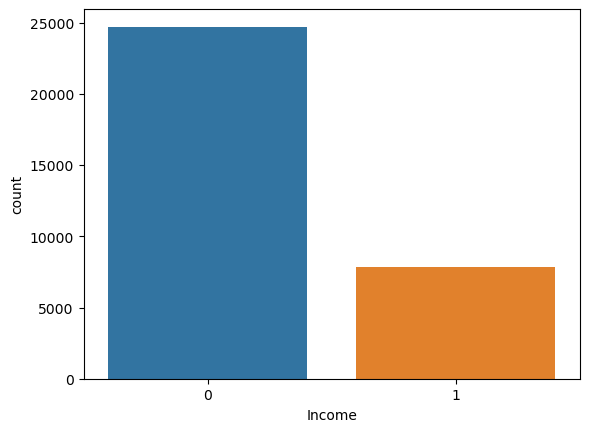

In [33]:
sns.countplot(x='Income', data=data)
plt.show()


In [34]:
#splitting the data into feature and target variable

y = data['Income']
x = data.drop(columns = ['Income'])

In [35]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # We are able to tackle the issue of biasness through standard scalar method


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [37]:
#splitting the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 40)


In [38]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier


In [39]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)   

ExtraTreesClassifier()

In [40]:
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.8108108108108109
[[6720  692]
 [1156 1200]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7412
           1       0.63      0.51      0.56      2356

    accuracy                           0.81      9768
   macro avg       0.74      0.71      0.72      9768
weighted avg       0.80      0.81      0.80      9768



ET predicts faster than random forest but is almost similar and this also creates many decision tree. here the accuracy score is 
81% . and from the f1-score we can see that this is not over fitting so overall it is a good model

In [41]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [42]:
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8207411957411958
[[6772  640]
 [1111 1245]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7412
           1       0.66      0.53      0.59      2356

    accuracy                           0.82      9768
   macro avg       0.76      0.72      0.74      9768
weighted avg       0.81      0.82      0.81      9768



here the accuracy score on our test data is 82% so we can also say that this is a good model

In [45]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 980.4 kB/s eta 0:01:42
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.5/99.8 MB 1.6 MB/s eta 0:01:01
   ---------------------------------------- 0.6/99.8 MB 1.8 MB/s eta 0:00:54
   ----------------------------------------

In [46]:
from xgboost import XGBClassifier


In [48]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
XGB.score(x_train,y_train) #here is the score of train data

0.8686381186381187

In [50]:
XGB.score(x_test,y_test) #here is the score of test data

0.8507371007371007

In [51]:
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.8507371007371007
[[7070  342]
 [1116 1240]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7412
           1       0.78      0.53      0.63      2356

    accuracy                           0.85      9768
   macro avg       0.82      0.74      0.77      9768
weighted avg       0.84      0.85      0.84      9768



Here the accuracy score is way better than the rest of the two models so we will take  this model for our prediction

In [52]:
import joblib
joblib.dump(XGB, 'Census_Income.pkl') #saving the model


['Census_Income.pkl']

In [53]:
XGB = joblib.load('Census_Income.pkl')

prediction = XGB.predict(x_test)
prediction


array([0, 0, 0, ..., 1, 0, 1])

In [54]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a              #here 0 is Loan status as 'No' and 1 is loan status as 'Yes'
data


,Predicted,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9763,1,0
9764,0,0
9765,1,0
9766,0,0


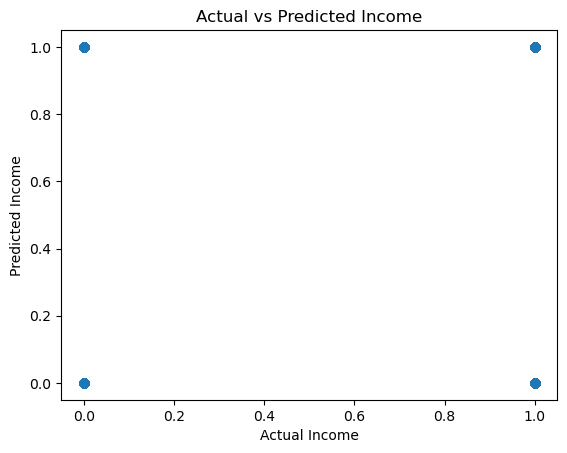

In [55]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.show() 